# 텐서플로 MNIST 모델

<img src="https://github.com/ksk8863/mnist_keras/blob/main/tensorflwo_keras2.png?raw=true" width="500">

## 완성 모델

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 - 2s - loss: 1.9429 - accuracy: 0.4140
Epoch 2/5
1875/1875 - 2s - loss: 1.3503 - accuracy: 0.6674
Epoch 3/5
1875/1875 - 2s - loss: 1.0147 - accuracy: 0.7825
Epoch 4/5
1875/1875 - 2s - loss: 0.8137 - accuracy: 0.8303
Epoch 5/5
1875/1875 - 2s - loss: 0.6860 - accuracy: 0.8520
Test loss: 0.6247602105140686
Test accuracy: 0.8668000102043152


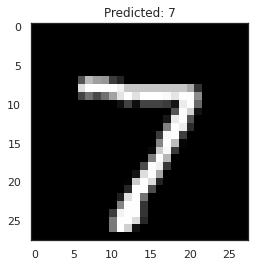

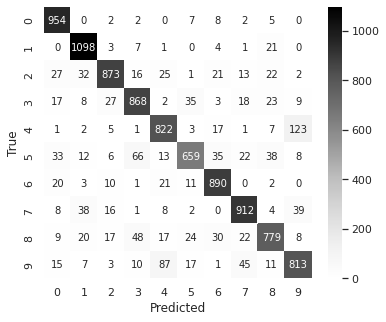

In [1]:
# 모듈 임포트
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(style='white')
%matplotlib inline

# 데이터 로드 및 전처리
(x_train, y_train),(x_test, y_test) = load_data() # 학습데이터와 테스트 데이터 로드
x_train = x_train/255. # 데이터 정규화 [0,1]
x_test = x_test/255. # 데이터 정규화 [0,1]
ytrain = to_categorical(y_train, num_classes = 10) # one-hot encoding
ytest = to_categorical(y_test, num_classes = 10) # one-hot encoding
xtrain = x_train.reshape(60000, 28*28) # 데이터를 1차원 변환
xtest = x_test.reshape(10000,28*28) # 데이터를 1차원 변환 

# 모델 구성
Model = Sequential()
Model.add(Dense(units=10, input_shape=(28*28,), activation='sigmoid'))
Model.add(Dense(units=10, activation='softmax'))
Model.summary()

# 모델 컴파일 및 학습
Model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
Model.fit(xtrain, ytrain, epochs=5, verbose=2)

# 모델 평가 및 예측
score = Model.evaluate(xtest, ytest, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred_test = Model.predict(xtest)
arg_pred_test = np.argmax(pred_test, axis=1)
plt.imshow(x_test[0],'gray')
plt.title('Predicted: {}'.format(arg_pred_test[0]))
plt.show()

matrix = confusion_matrix(y_test, arg_pred_test)
plt.figure(figsize=(6,5))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Greys') 
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### 데이터 로드 및 데이터 확인
  (런타임 초기화 후 진행)

- 모듈 임포트
  - [numpy](https://numpy.org/doc/stable/user/whatisnumpy.html), 수치 계산
  - [matplotlib](https://matplotlib.org/stable/tutorials/index.html), 데이터 시각화
  - [tensorflow](https://www.tensorflow.org/api_docs/python/tf), 기계학습을 위한 오픈소스

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
# notebook을 실행한 브라우저에 그림을 출력 해주는 역할
%matplotlib inline 

- 텐서플로에서 제공하는 데이터셋 불러오기
  - [tf.keras.datasets.mnist.load_data()](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data)


In [3]:
from tensorflow.keras.datasets.mnist import load_data

(x_train, y_train),(x_test, y_test) = load_data()

- 데이터 확인 

In [4]:
# 이미지 데이터 확인
import sys
print('학습 데이터:',x_train.shape, ', 테스트 데이터:',x_test.shape) 
np.set_printoptions(threshold=sys.maxsize,linewidth=np.inf) # 출력 길이 조절
print(x_train[0]) # 1번째 숫자 데이터 정보 출력 [0,255]

학습 데이터: (60000, 28, 28) , 테스트 데이터: (10000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0

In [21]:
# 레이블 데이터 확인[0,9]
print('첫번째 이미지 숫자: {}'.format(y_train[0]))
print(y_train[:30])

첫번째 이미지 숫자: 5
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7]


- 이미지 데이터 시각화
  - [plt.imshow()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)

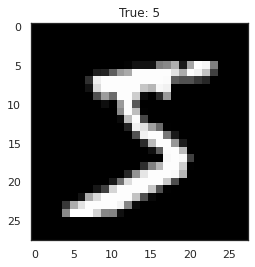

In [6]:
image = x_train[0]
plt.imshow(image,'gray')
plt.title('True: {}'.format(y_train[0]))
plt.show()

### 데이터 전처리


#### OneHot Encoding
0 = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]\
1 = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]\
2 = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]\
3 = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]\
4 = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]\
5 = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]\
6 = [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]\
7 = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]\
8 = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]\
9 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
- [tf.keras.utils.to_categorical()](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical)


In [7]:
from tensorflow.keras.utils import to_categorical

ytrain = to_categorical(y_train, num_classes = 10)
ytest = to_categorical(y_test, num_classes = 10)

print(y_train[0])
print(ytrain[0])


5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


#### 이미지 사이즈 변경
- [np.reshape()](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html), 혹은 narray.reshape()


<img src="https://github.com/ksk8863/mnist_keras/blob/main/flatten1.png?raw=true" width="500">

In [8]:
xtrain = x_train.reshape(60000, 28*28)
xtest = x_test.reshape(10000, 28*28)
xtrain = xtrain/255.
xtest = xtest/255.

np.set_printoptions(threshold=sys.maxsize,linewidth=47*3, precision=2) # 출력 길이 조절
print('학습 데이터:',xtrain.shape, ', 테스트 데이터:',xtest.shape) 
print(xtrain[0])

학습 데이터: (60000, 784) , 테스트 데이터: (10000, 784)
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.07 0.07 0.07 0.49 0.53 0.69 0.1  0.65 1.   0.97 0.5  0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.12 0.14 0.37 0.6  0.67 0.99 0.99 0.99 0.99 0.99 0.88 0.67 0.99 0.95 0.76 0.25 

### 모델 구성


- [Sequential()](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)
  - 모델이 순차적인 구조로 진행할 때 사용
  - .add()로 레이어 추가 가능
- [Dense()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)
  - 완전연결계층(Fully-Connected Layer)
  - 노드수(units), 인풋(input_shape), 활성화함수([activation](https://www.tensorflow.org/api_docs/python/tf/keras/activations))

<center><img src="https://github.com/ksk8863/mnist_keras/blob/main/dense.png?raw=true" height="200"><center>


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 30)                23550     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


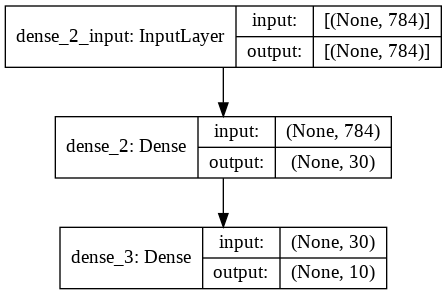

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
Model = Sequential()
Model.add(Dense(units=30, input_shape=(28*28,), activation='sigmoid'))
Model.add(Dense(units=10, activation='softmax'))
Model.summary()
tf.keras.utils.plot_model(Model, show_shapes=True)

### 모델 컴파일 및 학습하기

- model.compile
  - [loss function](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy): 모델이 훈련되는 동안 최소화될 값으로 학습이 잘 되고 있는지 나타내는 지표
  - [optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD)
  - [metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy) : 모니터링할 지표(mae, accuracy)
- model.fit
  - epochs: 전체 학습데이터 셋에 대해 학습횟 수

In [10]:
Model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
Model.fit(xtrain, ytrain, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6494 - accuracy: 0.6429
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9087 - accuracy: 0.8217
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6471 - accuracy: 0.8593
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5295 - accuracy: 0.8760
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4642 - accuracy: 0.8860


### 모델 평가 및 예측 하기


- model.evaluate()

In [11]:
score = Model.evaluate(xtest, ytest, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.42582952976226807
Test accuracy: 0.8949000239372253


- model.predict()
- [np.argmax()](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html), axis=0 -> 열, axis=1 -> 행 비교\
  (예시 np.argmax([0 1 4 2 3]) -> 2)

In [12]:
pred_test = Model.predict(xtest)
arg_pred_test = np.argmax(pred_test, axis=1)

print(pred_test[0])
print(arg_pred_test[0])

[1.58e-03 9.87e-04 9.39e-04 3.87e-03 8.89e-04 1.15e-03 8.08e-05 9.65e-01 3.38e-04 2.54e-02]
7


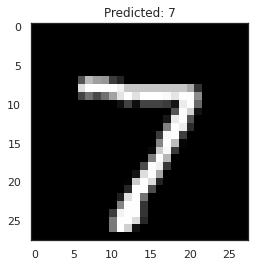

In [13]:
plt.imshow(x_test[0],'gray')
plt.title('Predicted: {}'.format(arg_pred_test[0]))
plt.show()

- [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) : 오차행렬

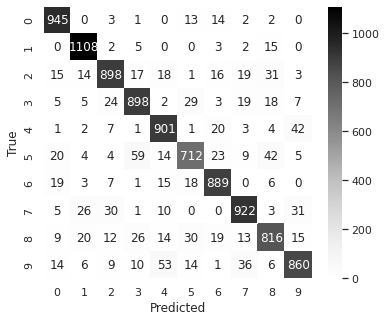

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(style='white')

matrix = confusion_matrix(y_test, arg_pred_test)
plt.figure(figsize=(6,5))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Greys') 
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 자료 요청

e-mail : ksk8863@korea.ac.kr